## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
# Load Dataset
file_path = "Sample - Superstore.csv" 
df = pd.read_csv(file_path, encoding="latin1")
df.head(3)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.0,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62,2,0.0,6.8714


### Data Preprocessing

In [11]:
# Convert date columns to datetime format
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])
# Check for missing values and duplicates
print("Missing Values:")
print(df.isnull().sum())
print("\nDuplicate Rows:", df.duplicated().sum())

# Drop unnecessary columns
df.drop(columns=['Row ID'], inplace=True)

Missing Values:
Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

Duplicate Rows: 0


# Visualization the Data

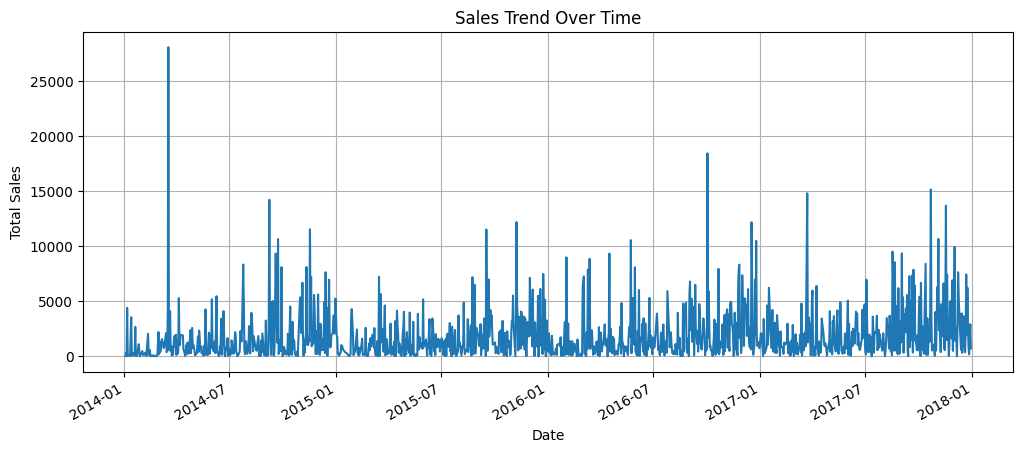

In [12]:
# Sales Trend Over Time
plt.figure(figsize=(12, 5))
df.groupby('Order Date')['Sales'].sum().plot()
plt.title("Sales Trend Over Time")
plt.xlabel("Date")
plt.ylabel("Total Sales")
plt.grid()
plt.show()

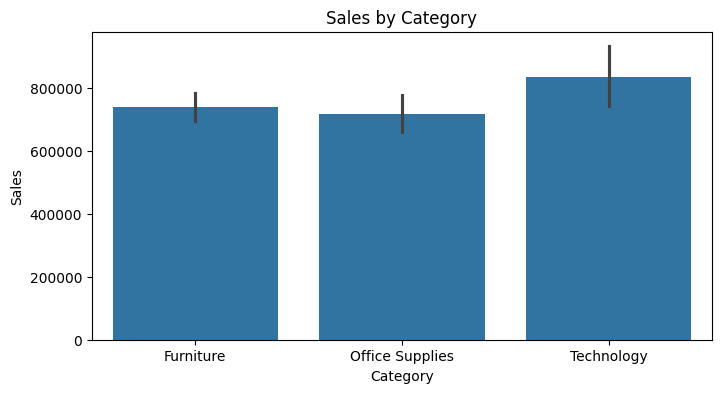

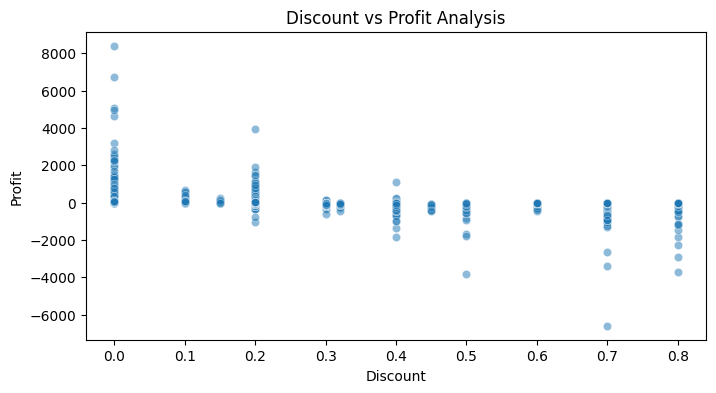

In [16]:
# Sales by Category
plt.figure(figsize=(8, 4))
sns.barplot(data=df, x='Category', y='Sales', estimator=sum)
plt.title("Sales by Category")
plt.show()

# Profit by Discount Level
plt.figure(figsize=(8, 4))
sns.scatterplot(data=df, x='Discount', y='Profit', alpha=0.5)
plt.title("Discount vs Profit Analysis")
plt.show()

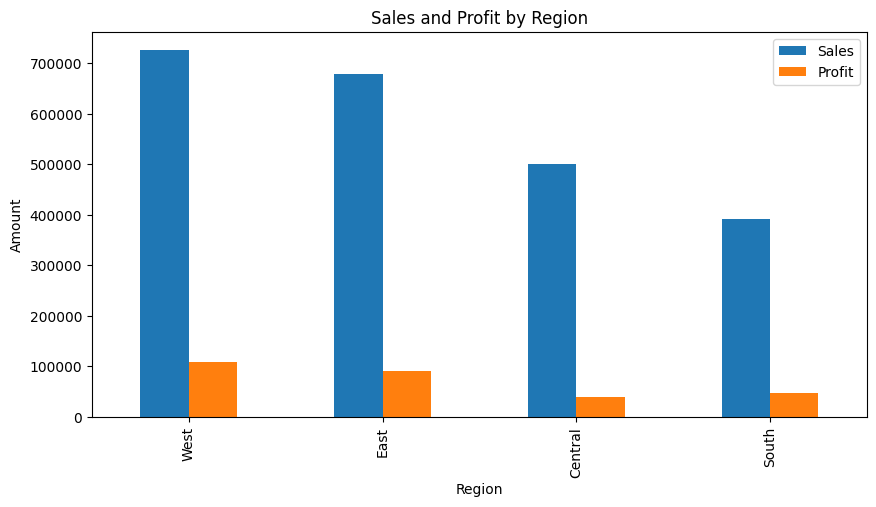

In [17]:
# Sales and Profit by Region
region_sales = df.groupby('Region')[['Sales', 'Profit']].sum().sort_values(by='Sales', ascending=False)
region_sales.plot(kind='bar', figsize=(10, 5))
plt.title("Sales and Profit by Region")
plt.ylabel("Amount")
plt.show()

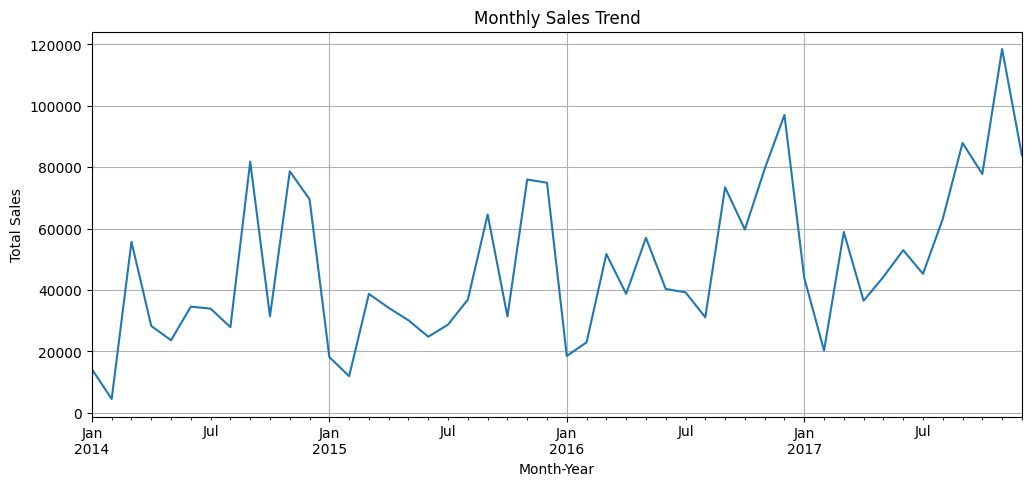

In [18]:
# Monthly Sales Trend
df['YearMonth'] = df['Order Date'].dt.to_period('M')
plt.figure(figsize=(12, 5))
df.groupby('YearMonth')['Sales'].sum().plot()
plt.title("Monthly Sales Trend")
plt.xlabel("Month-Year")
plt.ylabel("Total Sales")
plt.grid()
plt.show()

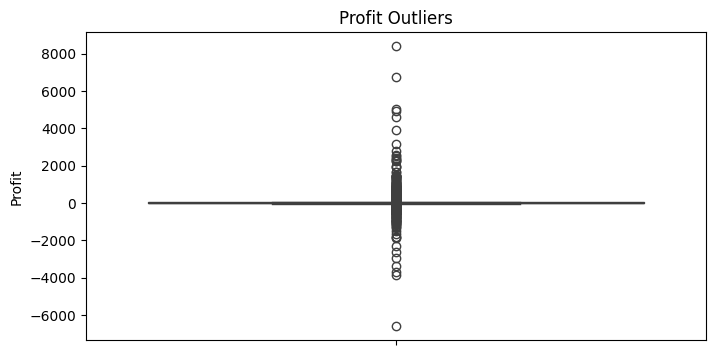

In [19]:
# Outlier Detection in Profit
plt.figure(figsize=(8, 4))
sns.boxplot(data=df, y='Profit')
plt.title("Profit Outliers")
plt.show()

## Key Insights:
1. Overall sales trend shows seasonal fluctuations with peaks in certain months.
2. The category with the highest sales is identified.
3. Higher discounts often result in lower profits, showing the impact of discounts on profitability.
4. Certain regions contribute more to sales and profit.
5. Outliers in profit indicate extreme losses or gains on certain transactions.